In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools

In [22]:
cell_df=pd.read_csv("16325569497737558.csv")
cell_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
cell_df=cell_df[['age', 'sex','cp','chol','fbs','thall','output']]
cell_df['output']=cell_df['output'].astype('int')
cell_df.head()

,age,sex,cp,chol,fbs,thall,output
0,63,1,3,233,1,1,1
1,37,1,2,250,0,2,1
2,41,0,1,204,0,2,1
3,56,1,1,236,0,2,1
4,57,0,0,354,0,2,1


In [24]:
feature_df = cell_df[['age', 'sex','cp','chol','fbs','thall',]]
X = np.asarray(feature_df)
X[0:5]

array([[ 63,   1,   3, 233,   1,   1],
       [ 37,   1,   2, 250,   0,   2],
       [ 41,   0,   1, 204,   0,   2],
       [ 56,   1,   1, 236,   0,   2],
       [ 57,   0,   0, 354,   0,   2]])

In [25]:
cell_df['output'] = cell_df['output'].astype('int')
y = np.asarray(cell_df['output'])
y [0:5]

array([1, 1, 1, 1, 1])

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 6) (242,)
Test set: (61, 6) (61,)


In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [28]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.558327393680209

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear',).fit(X_train,y_train)
print(LR)

LogisticRegression(C=0.01, solver='liblinear')


In [41]:
yhat=LR.predict(X_test)
print(yhat)
print(y_test)

[0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [42]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.57775227, 0.42224773],
       [0.45410454, 0.54589546],
       [0.52250349, 0.47749651],
       [0.35654146, 0.64345854],
       [0.30857441, 0.69142559]])

In [43]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.6

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[31  5]
 [ 7 18]]


Confusion matrix, without normalization
[[31  5]
 [ 7 18]]


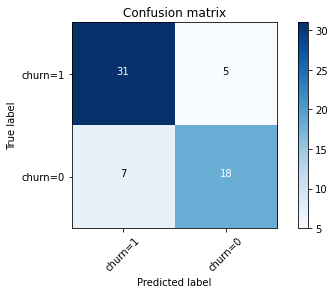

In [45]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [46]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.82      0.86      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [47]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5892790660374569

In [48]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8018387239698714